In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Load dataset

In [2]:
df = pd.read_csv("clustering_dataset_01.csv", header=None)
df.rename(columns={0: "x0", 1:"x1", 2:"label"}, inplace=True)

# Define functions & classes

In [3]:
def dist(p1, p2):
    """ 
        calculates the distance between points p1 and p2
        points must have the same amount of dimensions
        example: dist((1,2,3,4), (5,6,7,8))
    """
    return np.sqrt(sum([(dim[1] - dim[0])**2 for dim in zip(p1, p2)]))


class KMeans:
    """ Performs K-Means clustering """

    def __init__(self, n_clusters=8, random_state=None, max_iter=300):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iter = max_iter

    def fit(self, data):
        data = data.copy()

        # pick random cluster origins
        self.cluster_origins = data.sample(self.n_clusters, random_state=self.random_state)

        # loop until cluster origins stop changing or loop iterates max_iter times
        for _i in range(self.max_iter):

            # assign cluster labels to each point
            current_labels = []
            for _, point in data.iterrows():
                current_labels.append(self.classify_point(point))
            data['label'] = current_labels

            # calculate cluster means to become new origins
            new_cluster_origins = pd.DataFrame(columns=self.cluster_origins.columns)
            for i in range(self.n_clusters):
                cluster_points =  
                new_cluster_origins.loc[len(new_cluster_origins.index)] = cluster_points.mean()

            # exit loop if cluster origins no longer change
            if self.cluster_origins.equals(new_cluster_origins):
                print(f"fitting complete after {_i} iterations")
                break

            # save cluster origins and labels
            self.cluster_origins = new_cluster_origins
            self.labels = current_labels

        # calculate variance
        self.variance = 0
        for i, point in data.iterrows():
            self.variance += abs(dist(point, self.cluster_origins.iloc[self.labels[i]]))

        # return copy of data with cluster labels
        return data

    def classify_point(self, point):
        """ classifies given point to a cluster """
        label = 0
        least_dist = dist(self.cluster_origins.iloc[0], point)

        i = 0
        for _, cluster_origin in self.cluster_origins.iterrows():
            distance = dist(cluster_origin, point)
            if distance < least_dist:
                least_dist = distance
                label = i
            i += 1

        return label


def kmeans(x, k):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x)
    return km.labels

# Fit KMeans using k = 1...30

In [4]:
# this operation is very expensive so the fitted kmeans objects
#   are cached to be reused in the next cells

data = df.iloc[:, :2]
kmeans_objects = {}

for k in range(1, 31):
    print(f'> k = {k} ... ', end="")
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    kmeans_objects[k] = km

> k = 1 ... fitting complete after 1 iterations
> k = 2 ... fitting complete after 7 iterations
> k = 3 ... fitting complete after 10 iterations
> k = 4 ... fitting complete after 8 iterations
> k = 5 ... fitting complete after 11 iterations
> k = 6 ... fitting complete after 10 iterations
> k = 7 ... fitting complete after 10 iterations
> k = 8 ... fitting complete after 9 iterations
> k = 9 ... fitting complete after 10 iterations
> k = 10 ... fitting complete after 8 iterations
> k = 11 ... fitting complete after 8 iterations
> k = 12 ... fitting complete after 11 iterations
> k = 13 ... fitting complete after 15 iterations
> k = 14 ... fitting complete after 15 iterations
> k = 15 ... fitting complete after 15 iterations
> k = 16 ... fitting complete after 14 iterations
> k = 17 ... fitting complete after 14 iterations
> k = 18 ... fitting complete after 18 iterations
> k = 19 ... fitting complete after 19 iterations
> k = 20 ... fitting complete after 19 iterations
> k = 21 ... fi

# Plot reduction in variance over k

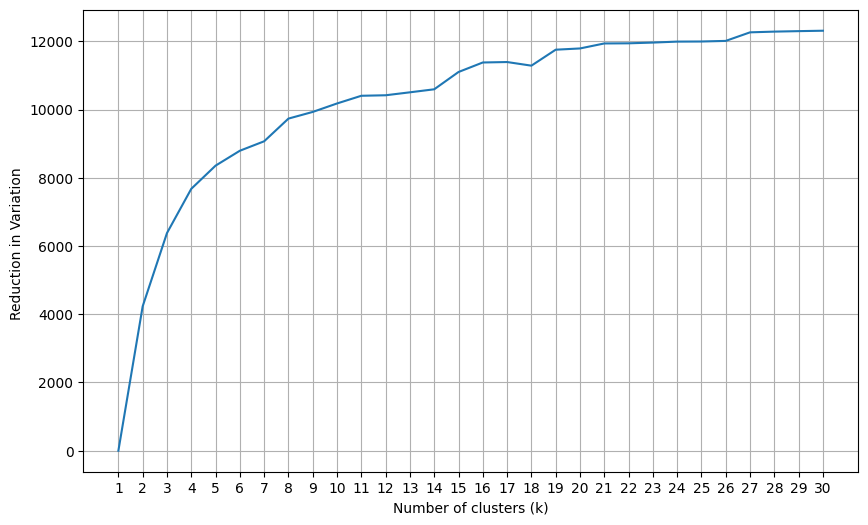

In [5]:
variance_reduction = []
for km in kmeans_objects.values():
    variance_reduction.append(kmeans_objects[1].variance - km.variance)

x = range(1, 31)
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=x, y=variance_reduction);
ax.set(ylabel="Reduction in Variation ", xlabel="Number of clusters (k)");
plt.xticks(x)
plt.grid();

# Plot clusters at  "elbow" k = 8

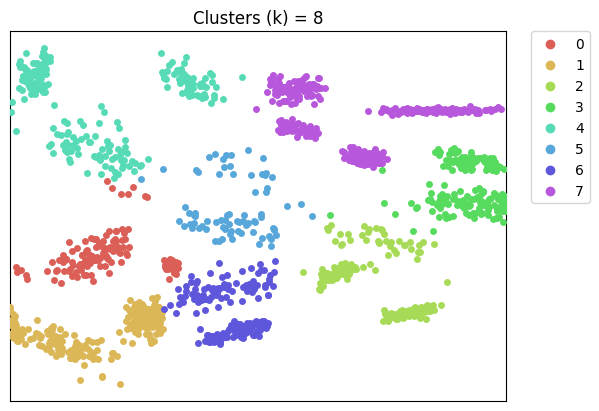

In [6]:
k = 8

km = kmeans_objects[k]
df_k8 = data.copy()
df_k8['label'] = km.labels

ax = sns.swarmplot(data=df_k8, x="x0", y="x1", hue="label", legend="full", palette=sns.color_palette("hls", k+1))
ax.set(title=f"Clusters (k) = {k}", ylabel="", xlabel="", yticklabels=[], xticklabels=[])
ax.tick_params(left=False, bottom=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

# Plot clusters at k = 20

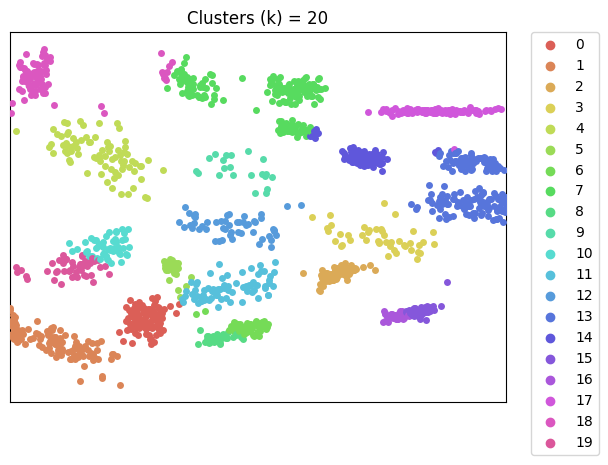

In [7]:
k = 20

km = kmeans_objects[k]
df_k20 = data.copy()
df_k20['label'] = km.labels

ax = sns.swarmplot(data=df_k20, x="x0", y="x1", hue="label", legend="full", palette=sns.color_palette("hls", k+1))
ax.set(title=f"Clusters (k) = {k}", ylabel="", xlabel="", yticklabels=[], xticklabels=[])
ax.tick_params(left=False, bottom=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

# Plot predefined clusters for comparision

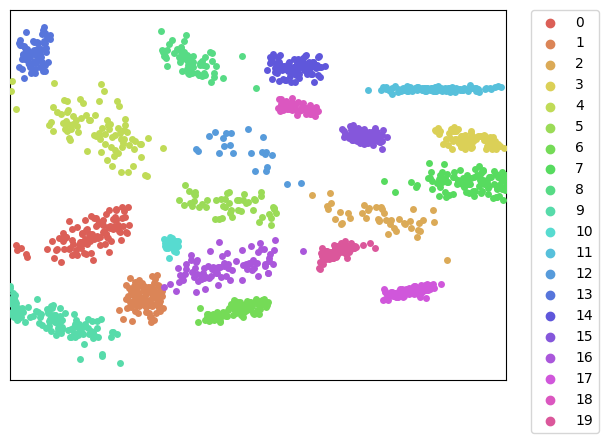

In [8]:
# takes about 30 seconds to render plot
ax = sns.swarmplot(data=df, x="x0", y="x1", hue="label", legend="full",
                   palette=sns.color_palette("hls", 21)) # 21 instead of 20 is intentinal
ax.set(ylabel="", xlabel="", yticklabels=[], xticklabels=[])
ax.tick_params(left=False, bottom=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

# Compare with original cluster assignments 

In [9]:
# what percentage of nodes are in the same cluster together
#   in both the original assignment and in your k-means assignment

k = 20
total_n = len(df)

original_pct = []
for i in range(k):
    original_pct.append(len(df.loc[df['label'] == i])/total_n)

my_pct = []
for i in range(k):
    my_pct.append(len(df_k20.loc[df_k20['label'] == i])/total_n)


print('\nPercentage of nodes in the same cluster together')
pct = pd.DataFrame({'original':original_pct, 'my':my_pct})
pct.index.names = ['cluster']
pd.options.display.float_format = '{:.2%}'.format
pct


Percentage of nodes in the same cluster together


,original,my
cluster,,
0,6.99%,6.66%
1,6.39%,7.12%
2,2.83%,5.67%
3,4.61%,2.90%
4,5.60%,5.27%
5,3.30%,2.44%
6,5.60%,3.82%
7,7.12%,12.52%
8,4.28%,1.91%
